In [65]:
import matplotlib.pyplot as plt

import os

import numpy as np 
import pandas as pd

import torch
from torch.utils.data import Dataset

import cv2

import xml.etree.ElementTree as ET

# FAIR1M --> object detection

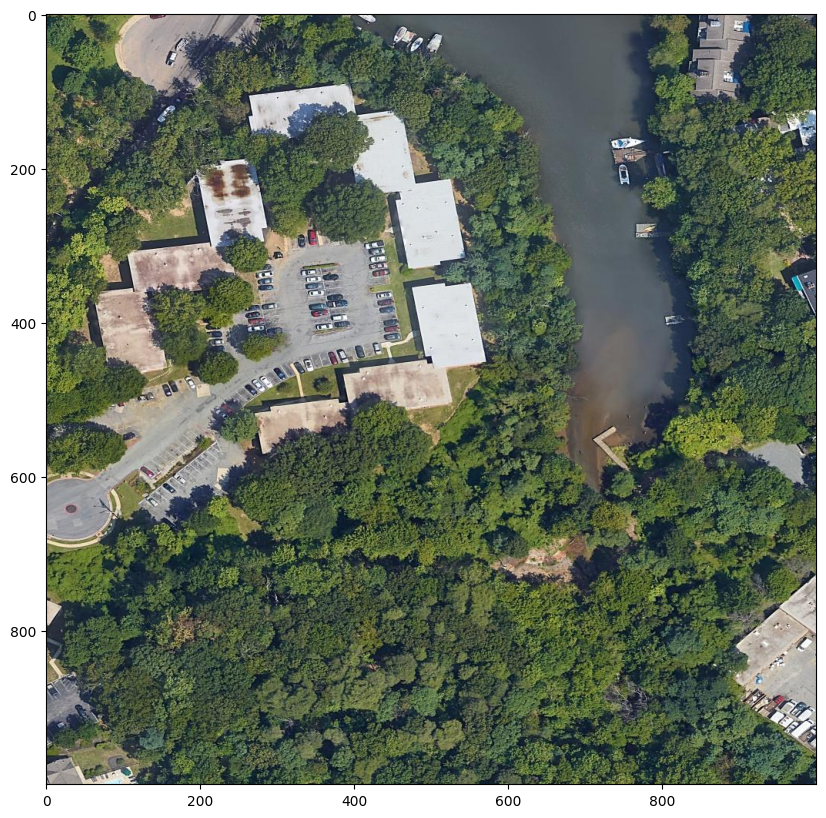

In [97]:
img = cv2.imread('datasets/FAIR1M_partial/Neighborhood/00016.tif')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(img)




# img = plt.imread('datasets/FAIR1M_partial/Neighborhood/00015.tif')
# plt.figure(figsize=(10,10))
# plt.imshow(img)

In [98]:
img.shape

(1000, 1000, 3)

### Airplanes

In [94]:
n_airplane_fair1m = len(os.listdir('datasets/FAIR1M_partial/Airplane_labels'))

airplane_names = []
for file in os.listdir('datasets/FAIR1M_partial/Airplane_labels'):

    # Parse the XML file
    tree = ET.parse('datasets/FAIR1M_partial/Airplane_labels/' + file)
    root = tree.getroot()

    # Extract the name of the object
    object_element = root.findall('.//objects/object')
    object_element = [e.find('.//possibleresult').find('name').text for e in object_element]
    airplane_names += [airplane_names.append(e) for e in object_element]
    print(object_element)
    # possibleresult_element = object_element.find('.//possibleresult')
    # name = possibleresult_element.find('name').text
    # names.append(name)

['other-airplane', 'A220', 'other-airplane', 'other-airplane', 'other-airplane', 'other-airplane']
['A220', 'other-airplane', 'other-airplane', 'other-airplane', 'other-airplane', 'other-airplane']
['Boeing737', 'Boeing737']
['other-airplane']
['A321']
['Boeing737', 'Boeing737']
['Boeing737', 'other-airplane', 'Boeing737', 'other-airplane', 'other-airplane', 'other-airplane', 'other-airplane']
['Boeing737', 'other-airplane', 'Boeing787', 'other-airplane', 'other-airplane']
['Boeing737', 'A220', 'A321', 'other-airplane', 'A220', 'A321', 'Boeing737']
['A220', 'A220', 'other-airplane']
['other-airplane', 'other-airplane', 'A321', 'A321', 'A220', 'other-airplane', 'A220']
['Boeing737', 'Boeing737', 'Boeing737', 'Boeing737', 'Boeing737', 'Boeing737']
['other-airplane', 'A220']
['A220', 'A220', 'A220', 'A220', 'A220']
['A321', 'A321', 'A220', 'Boeing737', 'Boeing737', 'Boeing737']
['A220', 'Boeing737', 'Boeing737', 'Boeing737']
['other-airplane', 'other-airplane', 'Boeing747', 'other-airplan

In [93]:
len(airplane_names), n_airplane_fair1m

(308, 30)

### Ships

In [79]:
n_ship_fair1m = len(os.listdir('datasets/FAIR1M_partial/Ship_labels'))

ships_names = []
for file in os.listdir('datasets/FAIR1M_partial/Ship_labels'):

    # Parse the XML file
    tree = ET.parse('datasets/FAIR1M_partial/Ship_labels/' + file)
    root = tree.getroot()

    # Extract the name of the object
    object_element = root.findall('.//objects/object')
    object_element = [e.find('.//possibleresult').find('name').text for e in object_element]
    print(object_element)

    # possibleresult_element = object_element.find('.//possibleresult')
    # name = possibleresult_element.find('name').text
    # names.append(name)

['Tugboat', 'Tugboat', 'Tugboat', 'Tugboat', 'Motorboat', 'Dry Cargo Ship']
['Dry Cargo Ship', 'Liquid Cargo Ship', 'Liquid Cargo Ship', 'Dry Cargo Ship', 'Tugboat', 'Tugboat']
['Dry Cargo Ship', 'Dry Cargo Ship']
['Dry Cargo Ship']
['Motorboat']
['Motorboat']
['Liquid Cargo Ship', 'Liquid Cargo Ship', 'other-ship', 'other-ship', 'other-ship']
['other-ship', 'other-ship', 'other-ship', 'other-ship', 'other-ship', 'other-ship', 'Engineering Ship', 'Dry Cargo Ship', 'other-ship', 'other-ship', 'other-ship', 'other-ship', 'other-ship', 'other-ship']
['other-ship', 'other-ship', 'other-ship', 'Motorboat', 'other-ship', 'other-ship']
['Passenger Ship']
['Dry Cargo Ship', 'Dry Cargo Ship']
['Warship', 'Tugboat', 'Tugboat', 'Motorboat', 'Motorboat', 'other-ship', 'Warship', 'Motorboat', 'Motorboat', 'Motorboat', 'Motorboat', 'Motorboat', 'Motorboat', 'Motorboat', 'Motorboat', 'Motorboat', 'other-ship']
['Engineering Ship', 'Engineering Ship', 'other-ship', 'other-ship', 'Liquid Cargo Ship', '

### Neighbourhood

In [80]:
n_neighborhood_fair1m = len(os.listdir('datasets/FAIR1M_partial/Neighborhood_labels'))

neighbourhood_names = []
for file in os.listdir('datasets/FAIR1M_partial/Neighborhood_labels'):

    # Parse the XML file
    tree = ET.parse('datasets/FAIR1M_partial/Neighborhood_labels/' + file)
    root = tree.getroot()

    # Extract the name of the object
    object_element = root.findall('.//objects/object')
    object_element = [e.find('.//possibleresult').find('name').text for e in object_element]
    print(object_element)

    # possibleresult_element = object_element.find('.//possibleresult')
    # name = possibleresult_element.find('name').text
    # names.append(name)

['Intersection', 'Intersection', 'Intersection', 'Intersection', 'Intersection', 'Intersection', 'Intersection', 'Intersection', 'Intersection', 'Intersection', 'Intersection', 'Small Car', 'Small Car', 'Small Car', 'Van', 'Small Car', 'Small Car', 'Van', 'Van', 'Van', 'Van', 'Small Car', 'Van', 'Small Car', 'Small Car', 'Van', 'Small Car', 'Small Car', 'Van', 'Small Car', 'Van', 'Small Car', 'Van', 'Van', 'Small Car', 'Small Car', 'Van', 'Van', 'Van', 'Van', 'Van', 'Van', 'Small Car', 'Small Car', 'Cargo Truck', 'Cargo Truck', 'Van', 'Van', 'Small Car', 'Van', 'Van', 'Small Car', 'Small Car', 'Van', 'Van', 'Small Car', 'Small Car', 'Small Car', 'Van', 'Small Car', 'Small Car', 'Small Car', 'Cargo Truck', 'Small Car', 'Small Car', 'Van', 'Van', 'Small Car', 'Small Car', 'Small Car', 'Small Car', 'Van', 'Small Car', 'Small Car', 'Small Car', 'Small Car', 'Small Car', 'Small Car', 'Small Car', 'Van', 'Small Car', 'Van', 'Van', 'Small Car', 'Small Car', 'Small Car', 'Small Car', 'Small Ca

In [ ]:
class FAIR1M(Dataset):
    def __init__(self, path):
        self.path = path

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        sample = self.data[index]
        
        return sample

# Create an instance of the CustomDataset class
data = [1, 2, 3, 4, 5]
dataset = CustomDataset(data)

# RESISC45 -> [airplane, bridge, ship]

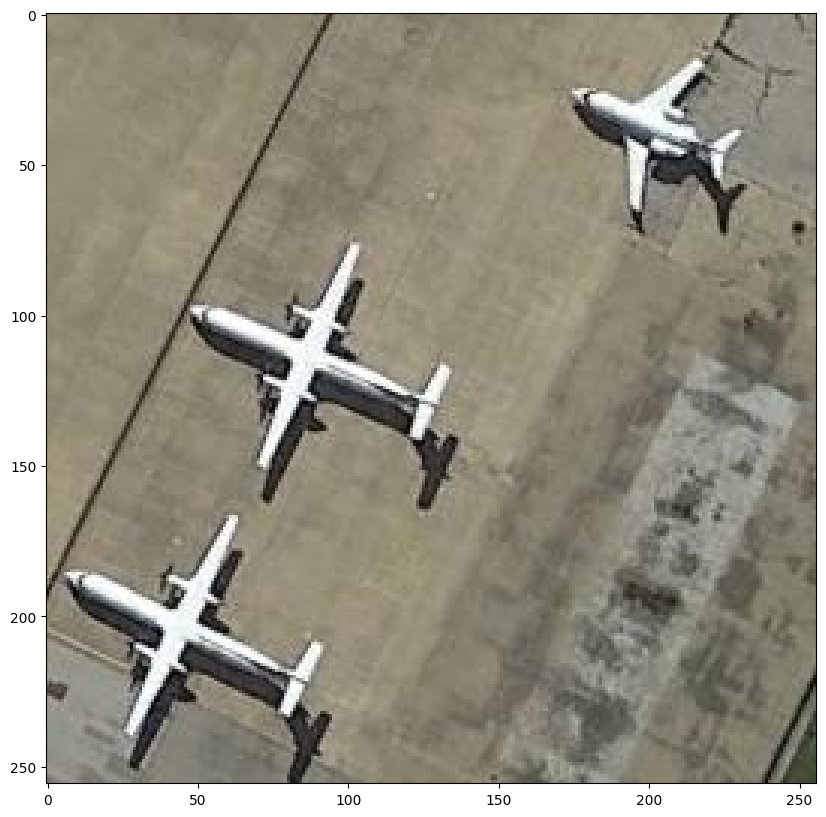

In [95]:
img = cv2.imread('datasets/RESISC45_partial/airplane/airplane_001.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(img)

In [96]:
img.shape

(256, 256, 3)

In [66]:
n_airplane_resisc = len(os.listdir('datasets/RESISC45_partial/airplane'))
n_bridge_resisc = len(os.listdir('datasets/RESISC45_partial/bridge'))
n_ship_resisc = len(os.listdir('datasets/RESISC45_partial/ship'))

In [68]:
print('Number of airplane images:', n_airplane_resisc)
print('Number of bridge images:', n_bridge_resisc)
print('Number of ship images:', n_ship_resisc)

Number of airplane images: 700
Number of bridge images: 700
Number of ship images: 700


# Sentinel2 -> [Ship, noShip]

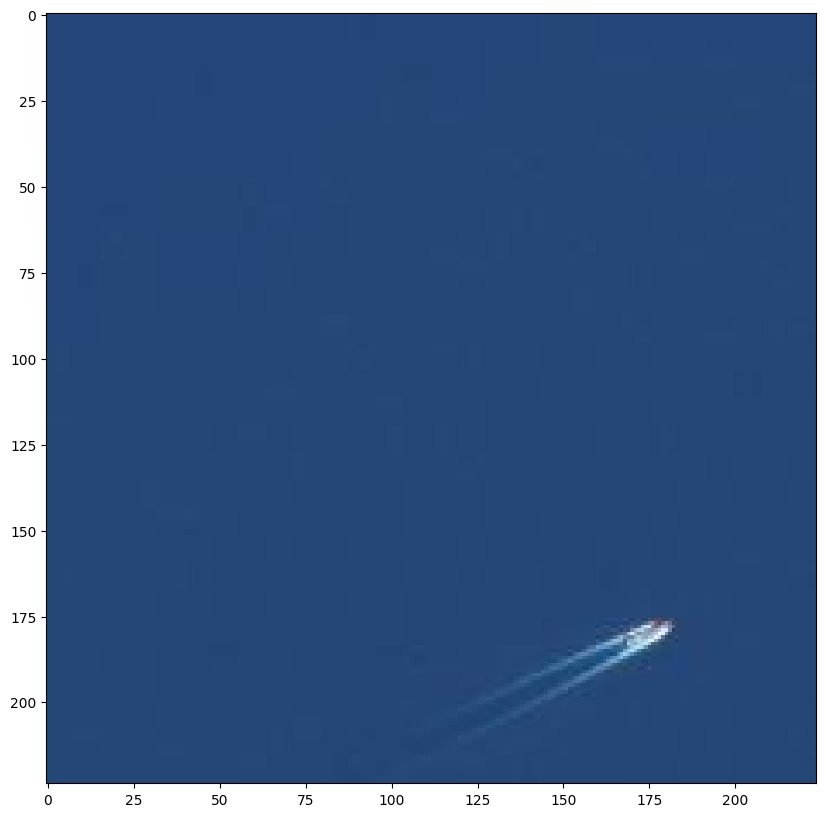

In [100]:
img = cv2.imread('datasets/Sentinel2_partial/Ship/0_2_3_id_410.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(img)

In [101]:
img.shape

(224, 224, 3)

In [69]:
n_ship_s2 = len(os.listdir('datasets/Sentinel2_partial/Ship'))
n_no_ship_s2 = len(os.listdir('datasets/Sentinel2_partial/NoShip'))

In [70]:
print('Number of ship images:', n_s2_ship)
print('Number of no ship images:', n_s2_no_ship)

Number of ship images: 1015
Number of no ship images: 894


# Dataframe

In [84]:
df = pd.DataFrame(index=['No Ship', 'S2 Ship', 'Ship', 'Airplane', 'Bridge', 'Neighbourhood'], columns=['No'], data=[n_s2_no_ship, n_s2_ship, n_ship_resisc + n_ship_fair1m, n_airplane_resisc + n_airplane_fair1m, n_bridge_resisc, n_neighborhood_fair1m])

In [85]:
df

,No
No Ship,894
S2 Ship,1015
Ship,730
Airplane,730
Bridge,700
Neighbourhood,30
